In [1]:
%matplotlib inline

import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns
# plt.style.use('ggplot')

In [2]:
namelist = ['name','timestamp','count']
oo = pd.read_csv('~/projects/uatu/uatu.csv', index_col=False,names=namelist)

In [3]:
df2 = oo.fillna(0)

In [4]:
names = oo['name'].unique()

In [5]:
names

array(['camera_1', 'camera_2', 'camera_3', 'camera_4', 'camera_5',
       'camera_6', 'camera_7', 'camera_8', 'camera_9', 'camera_10',
       'camera_11', 'camera_12', 'camera_13', 'camera_14', 'camera_15',
       'camera_16', 'camera_17', 'camera_18', 'camera_19', 'camera_20',
       'camera_21', 'camera_22', 'camera_23', 'camera_24'], dtype=object)

In [7]:
oo.reset_index()
grouped = oo.groupby('name').max()
grouped

,timestamp,count
name,,
camera_1,1.579981e+09,NaN
camera_10,1.579981e+09,NaN
camera_11,1.579981e+09,2.0
camera_12,1.579981e+09,0.0
camera_13,1.579981e+09,4.0
camera_14,1.579981e+09,7.0
camera_15,1.579981e+09,9.0
camera_16,1.579981e+09,9.0
camera_17,1.579981e+09,9.0


Text(0.5, 1.0, 'people count vs camera position')

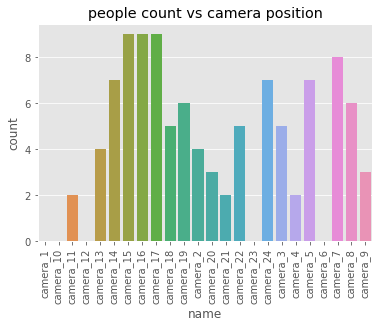

In [37]:
sorted_by_camera = grouped.sort_values('name', )
sorted_by_camera.reset_index(inplace=True)
chart = sns.barplot(data = sorted_by_camera, x = 'name', y= 'count')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title('people count vs camera position')

In [33]:
oo2 = oo.dropna()
oo2['timestamp'] = oo2['timestamp'].apply(lambda t: time.strftime("%d-%m-%y", time.localtime(int(t))))


/home/paul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'people count vs hours')

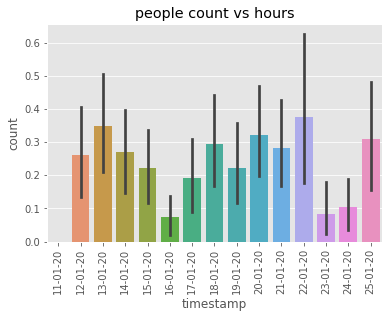

In [48]:
# oo2[(oo2.name == 'camera_17')].plot(x='timestamp', y='count',kind='line')
chart17= sns.barplot(data=oo2[(oo2.name == 'camera_17')], x='timestamp', y='count')
chart17.set_xticklabels(chart17.get_xticklabels(), rotation=90)
chart17.set_title('people count vs hours')

In [53]:
grouped.sort_values('name').info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, camera_1 to camera_9
Data columns (total 2 columns):
timestamp    24 non-null float64
count        21 non-null float64
dtypes: float64(2)
memory usage: 576.0+ bytes


In [84]:
oo.reset_index()
grouped = oo.groupby('name').max()
grouped2 = oo.groupby('name').count()

,timestamp,count
name,,
camera_1,1280,0
camera_10,1280,0
camera_11,1280,786
camera_12,1280,1258
camera_13,1280,1237
camera_14,1280,1254
camera_15,1280,1231
camera_16,1280,1053
camera_17,1280,1259


Text(0.5, 1.0, 'average count vs camera position')

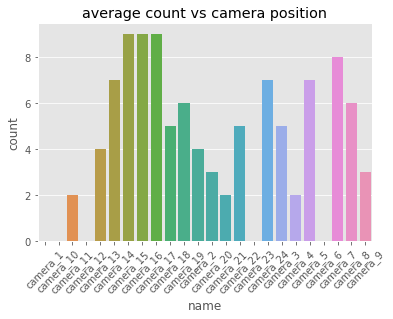

In [83]:
sorted_by_camera = grouped.sort_values('name', )
sorted_by_camera.reset_index(inplace=True)
chart = sns.barplot(data = sorted_by_camera, x = 'name', y= 'count')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title('average count vs camera position')

In [105]:
from sklearn.model_selection import train_test_split
grouped2.reset_index(inplace=True)
grouped2
labels = grouped2['name']
features = grouped['count']
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=42)

In [109]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# model = gnb.fit(train, train_labels)

21     camera_7
5     camera_14
2     camera_11
12    camera_20
15    camera_23
3     camera_12
4     camera_13
22     camera_8
17     camera_3
20     camera_6
23     camera_9
7     camera_16
10    camera_19
14    camera_22
19     camera_5
6     camera_15
Name: name, dtype: object